# Modelos em Arvore

As arvores de decisão talvez sejam os modelos mais famosos que temos contato, quando entramos no mundo de classificação, de certa forma talvez elas tenham muito mais relação com nosso dia a dia do que demais modelos, já que de certa forma, muitos problemas de negócio são tratados como uma arvore de decisão.

Apesar de parecerem simples, 

Ao todo existem três principais tipos de algoritmos que normalmente lidamos, todos eles são arvores de decisão, porém lidam com problemas diferentes e foram construidos em épocas diferentes, os algoritmos tratados aqui serão:
- ID3;
- C4.5;
- CART;
    
A ordem que trataremos dos algoritmos é relacionado principalmente a sua complexidade e a quantidade de problemas que eles lidam, nosso objetivo aqui é tentar replicar de forma simples a lógica desses algoritmos na linguagem python, e comparar alguns resultados que temos com esses algoritmos feitos a mão, com o que encontramos em algumas bibliotecas populares, no nosso caso, utilizaremos o modulo de arvores de decisão do pacote sci-kit-learn, uma das principais bibliotecas quando se trata da utilização de modelos de "machine learning".

## ID3

então vamos lá! Primeiramente trataremos do modelo de arvore de decisão chamado ID3, um dos primeiros algoritmos e o mais simples dos três, é importante destacar já de inicio uma de suas propriedades/limitações, o algoritmo lida apenas com dados que contenham variavel dependente binaria e dados de apoio/variaves independentes também binarias, de forma reduzida ele trabalha apenas com classificação binaria e também exige que as variaveis explicativas também sejam binarias.

O funcionamento do algoritmo é bem explicado pelo Pseudo-Cósigo

Link: 
- https://scikit-learn.org/stable/modules/tree.html

- https://en.wikipedia.org/wiki/ID3_algorithm

Pseudo Code: 

ID3 (Examples, Target_Attribute, Attributes)
1. Create a root node for the tree
- If all examples are positive, Return the single-node tree Root, with label = +.
- If all examples are negative, Return the single-node tree Root, with label = -.
- If number of predicting attributes is empty, then Return the single node tree Root, with label = most common value of the target attribute in the examples.
    Otherwise Begin
        A ← The Attribute that best classifies examples.
        Decision Tree attribute for Root = A.
        For each possible value, vi, of A,
            Add a new tree branch below Root, corresponding to the test A = vi.
            Let Examples(vi) be the subset of examples that have the value vi for A
            If Examples(vi) is empty
                Then below this new branch add a leaf node with label = most common target value in the examples
            Else below this new branch add the subtree ID3 (Examples(vi), Target_Attribute, Attributes – {A})
    End
    Return Root
    
    
Resumo em Português:

Funcao ID3( Dados , Atributos)

1. Criar um nó base/raiz para a arvore
- Se todos os exemplos são da classe +, retorne +;
- Se todos os exemplos são da classe -, retorne -;
- Se não existem mais variaveis explicativas retorne a classe com maior quantidade de representantes (seja ela + ou -)
Caso contrario inicie o processo:
    A <- Atributo que melhor classifica as observações
    Para cada valor de A:
        Adicionar um novo nó, correspondente a apenas observações em que A = valor 1, ou A = valor 2
        Seja Exemplo(valor 1) as observações cujo A == valor 1
        Se Exemplo(valor 1) é vazio
            Então retorne a categoria mais comum entre as observações (sendo + ou - )
        Caso Exemplo(valor 1) não seja vazio chame a funcao ID3 novamente aonde ID3 ( Exemplo(valor 1), Atributos que nao sejam A )
    Fim
    Retornar Raiz

Explicado o fluxo do algoritmo de uma arvore ID3, vem a pergunta, como é selecionado o atributo que melhor classifica as observações ? a simples descrição de que isso é apenas uma passo no algoritmo nos deixa um conceito vazio que é justamente entender como classificar esse atributo.

A seleção de um atributo em uma arvore de decisão é feita pelo calculo de entropia, para todos os Atributos colocados no algoritmo selecionase aquele que melhor reduz a entropia, ou seja a minimiza.

### O que é entropia ?

Em uma definição formal a entropia é matematicamente definida pela formula abaixo:

$$ H(X) = \sum_{ k \in K}p(x = k )log_{2} p(x = k) $$

Para uma explicação mais aprofundada do conceito de entropia e como ela se relaciona com a teoria de informação, consultar link em anexo.

Em resumo uma arvore de decisão sempre selecionara para cada um de seus nós o atributo que reduz a incerteza, ou seja, consegue discriminar melhor as classes, assim a redução da entropia é literalmente redução da incerteza quanto a classificação, um atributo que classifica, 50% das observações como uma classe e 50% das restantes como a outra classe não traz um ganho de dicriminação, já que é sujeito a uma especie de aleatoriedade, algora um atributo que consegue classificar 75% das observações a uma classe e os 25% restantes a outra traz um ganho ao estado inicial, já que é melhor que a suposta aleatoriedade.

Procedimento do algoritmo consiste em identificar atributos em ordem os atributos que mais reduzem a entropia, depois dividir os dados com base nesse atributo, e repetir esse processo até o momento que não existam mais atributos, ou que a divisão simplesmente resulte em grupos que contenham apenas uma classe.

## Anexos:



# Dados de exemplo

Para nos ajudar na construção e vizualização de resultados, vamos utilizar como dataset pricipal o Cardiac Desease, disponivel pelo link abaixo:

https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease

In [1]:

import re
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import itertools

# Data set de exemplo o Cardiac desease
# Fonte: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

# Load Example Data

att_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

data = pd.read_csv( r"https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", 
                    names = att_names )

cat_vars = ["sex","cp","fbs","restecg","exang","slope","ca","thal"]

data = ( data
         .assign( **{ col : data[col].astype(str) for col in cat_vars } ) )

data['y'] = [ 0 if k == 0 else 1 for k in data['num'] ]




new_data = pd.concat( [pd.get_dummies( data['cp'], prefix = "cp", drop_first = True ),data['exang'], data['y']], axis = 1 )


new_data


,cp_2.0,cp_3.0,cp_4.0,exang,y
0,0,0,0,0.0,0
1,0,0,1,1.0,1
2,0,0,1,1.0,1
3,0,1,0,0.0,0
4,1,0,0,0.0,0
...,...,...,...,...,...
298,0,0,0,0.0,1
299,0,0,1,0.0,1
300,0,0,1,1.0,1
301,1,0,0,0.0,1


In [2]:

# Cria funcao

''' Calculo da Entropia em uma variavel de classe '''
    

def entropy_calc_class( x, y, n ):
    
    clas = list( set( x ) )
    #print( clas, len( x ), list( x ) )
    vector_class = [ [list(x)[j] == i for j in range(0, len(list( x ))) ] for i in clas ]
    
    probs = [ np.mean( list( itertools.compress( y, k ) ) ) for k in vector_class ]
    
    return { n : - np.sum( [ k*np.log2(k) for k in probs ] ) }

''' Algoritmo Arvore ID3 '''

def id3_class_tree( data, x, y ):
    
    classes = set( data[y] )
    
    occur   = [ list(data[y]).count(i) for i in classes ]
    
    if len( classes ) == 1:
        #print( [ 'N = '+str( len(data[y]) ), str( list( classes ) )] )
        
        return { 'N' : str( len(data[y]) ), 
                 'v' : { item : list(data[y]).count(item) for item in set( classes ) }, 
                 'm' : np.mean(data[y]) }
    
    if len( x ) == 0:
        #print( [ 'N = '+str( len(data[y]) ), str( max( list( data[y] ), key = list( data[y] ).count ) ), np.mean(data[y]) ] )
        
        return { 'N' : str( len(data[y]) ), 
                 'v' : { item : list(data[y]).count(item) for item in set( classes ) }, 
                 'm' : np.mean(data[y]) }
    
    # Ordena as variáveis com maior entropia
    
    f_ent = sorted( [ entropy_calc_class( x = data[ i ], 
                                          y = data['y'], 
                                          n = i ) for i in x ], 
                     key = lambda x: list(x.values())[0] )
    
    ord_ent = [ list( dic.keys() )[0] for dic in f_ent ]
    
    return { str( ord_ent[0] ) : { k : 
               id3_class_tree( data = data[ data[ord_ent[0]] == k ], 
                                x = ord_ent[1:], 
                                y = y ) for k in set( data[ ord_ent[0] ] ) } }



teste = id3_class_tree( data = new_data, x = ['cp_4.0','cp_3.0','cp_2.0','exang'], y = 'y' )

# print( teste )

In [3]:


classes = dict( new_data.loc[ 2, ['cp_4.0','cp_3.0','cp_2.0'] ] )

def classifica( id3_model : dict, classes : dict ):
    
    d = id3_model
    
    while 'm' not in [ k[0] for k in list( d.items() ) ]:
        #print( list( d.items() ) )
        #print( d )
        for i,j in d.items():
            #print( i, " : ", classes[i] )
            r = list( d.items() )[0]
            if len( j ) == 2:
                for s in range(0, 2):
                    if classes[i] == [ k[0] for k in list( r[1].items() ) ][s]:
                        #print( list( r[1].items() )[s] )
                        d = list( r[1].items() )[s][1]
                        
            else :
                d = list( r[1].items() )[0][1]
 
    return d['m']

def return_model_id3_result( data, columns: list[str], y: str ):    
    
    tree_id3 = id3_class_tree( data, columns, y )
    
    return [ classifica( tree_id3 ,dict( data.loc[ n, columns ] ) ) for n in range(0,len(new_data)) ]
    

In [4]:

data[['num']].assign( n = 1 ).groupby(['num'] ).agg('sum')

,n
num,
0,164
1,55
2,36
3,35
4,13


[Text(0.625, 0.9, 'X[0] <= 0.5\ngini = 0.497\nsamples = 303\nvalue = [164, 139]'),
 Text(0.4166666666666667, 0.7, 'X[3] <= 0.5\ngini = 0.336\nsamples = 159\nvalue = [125, 34]'),
 Text(0.25, 0.5, 'X[2] <= 0.5\ngini = 0.32\nsamples = 140\nvalue = [112, 28]'),
 Text(0.16666666666666666, 0.3, 'X[1] <= 0.5\ngini = 0.335\nsamples = 94\nvalue = [74, 20]'),
 Text(0.08333333333333333, 0.1, 'gini = 0.432\nsamples = 19\nvalue = [13, 6]'),
 Text(0.25, 0.1, 'gini = 0.304\nsamples = 75\nvalue = [61, 14]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.287\nsamples = 46\nvalue = [38, 8]'),
 Text(0.5833333333333334, 0.5, 'X[1] <= 0.5\ngini = 0.432\nsamples = 19\nvalue = [13, 6]'),
 Text(0.5, 0.3, 'X[2] <= 0.5\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.4166666666666667, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5833333333333334, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(0.8333333333333334

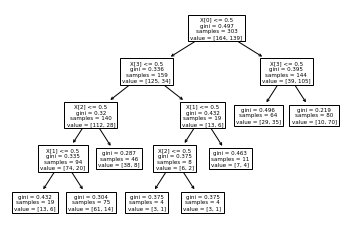

In [6]:
# Teste Arvore com Graphviz para ScikitLean

import sklearn
from sklearn import tree
import graphviz

#iris = load_iris()

resultados_id3 = return_model_id3_result( new_data, ['cp_4.0','cp_3.0','cp_2.0','exang'], 'y' )

#iris
clf = sklearn.tree.DecisionTreeClassifier()
clf = clf.fit( new_data[['cp_4.0','cp_3.0','cp_2.0','exang']], new_data[['y']] )

tree.plot_tree(clf)



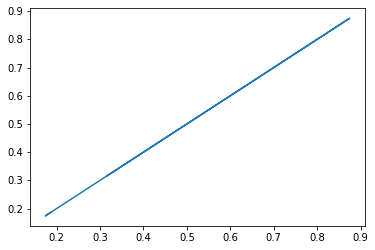

In [7]:

import matplotlib.pyplot as plt

x1 = [ k[1] for k in clf.predict_proba( new_data[['cp_4.0','cp_3.0','cp_2.0','exang'] ].assign( exang = pd.to_numeric( new_data['exang'] ) ) ) ] 

#print( [ x1[i] == resultados[i] for  i in range(0, len(x1)) ] )

plt.plot( x1, resultados_id3 )
plt.show()

# C4.5

Visto os resultados para o caso do algoritmo ID3, vamos ao caso do algoritmo C4.5, nesse caso estamos falando de uma evolução do proprio ID3, e nessa evolução o escopo de variaveis explicativas aumenta, anteriormente poderiamos apenas usar variaveis explicativas binarias, ou seja que contém duas classes, a partir de agora estamos lidando com um escopo um pouco maior aonde podemos usar variaveis explicativas continuas!

Mas como uma variavel continua é utilizada para a classificação? Nesse caso a variável continua por si só não seria muito útil, porém é possível utilizar uma variável continua e a partir dela realizar uma quebra transformando essa variavel em uma variavel binaria, assim ao invés de usar uma variável como renda domiciliar per capta para a classificação, podemos usar uma variável derivada como "Renda > X" ou "Renda <= X".

Assim o algoritmo também constroi novas variáveis a partir desse conjunto de variáveis continuas, escolhendo para elas uma quebra que tenha a menor entropia.

Abaixo temos o Pseudo-Código

This algorithm has a few base cases.

- All the samples in the list belong to the same class. When this happens, it simply creates a leaf node for the decision tree saying to choose that class.
- None of the features provide any information gain. In this case, C4.5 creates a decision node higher up the tree using the expected value of the class.
- Instance of previously unseen class encountered. Again, C4.5 creates a decision node higher up the tree using the expected value.
Pseudocode
- In pseudocode, the general algorithm for building decision trees is:

Check for the above base cases.
- For each attribute a, find the normalized information gain ratio from splitting on a.
- Let a_best be the attribute with the highest normalized information gain.
- Create a decision node that splits on a_best.
- Recurse on the sublists obtained by splitting on a_best, and add those nodes as children of node.

Casos base do algoritmo:
- Se todas as observações pertencem a mesma classe, retornar a classe unica
- Nenhum dos atributos provem ganho de informação, criar um nó que retorna a classe com maior valor experado.

Algoritmo se comporta:
- Para cada atributo a, achar o ganho de informação por dividir os dados com base nesse atributo
- Seja a_best o atributo com maior ganho de informação
- Criar um nó que divide os dados com base no atributo a_best
- para cada novo galho do nó criado repetir o algoritmo de forma recursiva;



In [1]:

# Funcao de calculo gini:
# - Retorna o coeficiente de gini de uma variavel ´x´ dada uma relação com a variavel binarua ´y´
#
# @x    - lista representando a variavel independente
# @y    - lista representando a variavel dependente (binaria set( y ) = {0,1}
# @n    - classe da variavel independente
# @c    - classe da variavel analisada podendo ser "cat" ou "num"
# @name - nome da variavel analisada (Opcional e usada apenas para numéricas)
# @k    - ponto de corde da variavel (Opcional e usada apenas para categoricas)

def gini_calc_class( x, y, n, c, name = "", k = "" ):
    
    clas = list( set( x ) )
    
    vector_class = [ [list(x)[j] == i for j in range(0, len(list( x ))) ] for i in clas ]
    
    probs = [ np.mean( list( itertools.compress( y, k ) ) ) for k in vector_class ]
    pops  = [ len( list( itertools.compress( y, k ) ) ) for k in vector_class ]
    gini  = [ 2*k*(1-k) for k in probs ]
    
    if c == "cat":
        return { n  : np.sum([ pops[i]*gini[i] for i in range( 0, len( pops ) ) ])/np.sum(pops), 
                 'c': c } 
        
    else :
        return { n      : np.sum([ pops[i]*gini[i] for i in range( 0, len( pops ) ) ])/np.sum(pops), 
                 'c'    : c,
                 'name' : name,
                 'split': k} 

def split_cont_var( x, y, n, c ):   
    
    set_test = sorted( set( x ) ) 
    
    #print( set_test )
    #print( len( set_test ) )
    
    if len( set_test ) == 1:
        return gini_calc_class( x = x <= set_test[0], y = y, n = n+"<="+str(set_test[0]), c = c, name = n, k = set_test[0] )
    
    split_x  = [ np.mean([set_test[i-1], set_test[i]]) for i in range(1, len(set_test) ) ]
    ginis    = [ gini_calc_class( x = x <= i, y = y, n = n+"<="+str(i), c = c, name = n, k = i ) for i in split_x ]
    # print( sorted( ginis, key = lambda x: list(x.values())[0] ) )
    
    # print( ginis )
    return sorted( ginis, key = lambda x: list(x.values())[0] )[0]


#entropys = split_cont_var( data['trestbps'], data['y'], 'trestbps' )

#print( entropys )


''' Algoritmo C4.5 '''

# Algoritmo de arvore de classificação C4.5 :
# - Dado uma lista de variáveis ´x´ pertencendo a classes ´categorias´ e ´numéricas´
#
# @data - pandas.DataFrame da fonte de dados
# @x    - lista de variáveis que podem ser categóricas e numéricas
# @y    - variável dependente (Binária - set(data[y]) = {0,1}

def c45_class_tree( data, x, y ):
    
    classes = list( set( data[y] ) )
    
    occur   = [ list(data[y]).count(i) for i in classes ]
    
    # Possiveis Condicoes para encerrar arvore:
    # 1. Todas observacoes pertecem a mesma classe ´y´;
    # 2. Nao existem mais variaveis independentes para serem usadas;
    # 3. Variaveis nao contém informacao adicional (pertecem a uma mesma classe);
    
    if len( classes ) == 1:
        # print( [ 'N = '+str( len(data[y]) ), str( list( classes ) )] )
        
        return { 'N' : str( len(data[y]) ), 
                 'v' : { item : list(data[y]).count(item) for item in set( classes ) }, 
                 'm' : np.mean(data[y]) }
    
    if len( x ) == 0:
        # print( [ 'N = '+str( len(data[y]) ), str( max( list( data[y] ), key = list( data[y] ).count ) ), np.mean(data[y]) ] )
        
        return { 'N' : str( len(data[y]) ), 
                 'v' : { item : list(data[y]).count(item) for item in set( classes ) }, 
                 'm' : np.mean(data[y]) }

    
    if len( x ) == 1 and len( set( data[x[0]] ) ) == 1:
        #print( x )
        
        return { 'N' : str( len(data[y]) ), 
                 'v' : { item : list(data[y]).count(item) for item in set( classes ) }, 
                 'm' : np.mean(data[y]) }
    
    if np.sum( [ len( set( data[k] ) ) for k in x ] ) == len( x ):
        
        return { 'N' : str( len(data[y]) ), 
                 'v' : { item : list(data[y]).count(item) for item in set( classes ) }, 
                 'm' : np.mean(data[y]) }

    
    # Pega conjunto de variaveis e ordena de acordo com maior Gini (Maior discriminacao)
    # Classifica variavel entre númerica e categorica:
    # 1. Númerica presente no intervalo de inteiros e floats com duas ou mais classes;
    # 2. Categórica apenas aponta variavel binaria (0,1);
    
    f_ent = sorted( [ gini_calc_class( x = data[ i ], 
                                       y = data[ y ], 
                                       n = i,
                                       c = "cat") if len( set( data[i] ) ) == 2 and list( set( data[i] ) ) == [0,1]
                      else split_cont_var( x = data[ i ],
                                           y = data[ y ],
                                           n = i,
                                           c = "num") for i in x ], 
                     key = lambda x: list(x.values())[0] )
    
    ord_ent = [ list( dic.keys() )[0] for dic in f_ent ]
    
    # Recursao referente a classificao de arvore em duas opcoes:
    # 1. Saida numérica
    # 2. Saida categorica
    
    
    if f_ent[0]["c"] == "num":
        
        return { str( ord_ent[0] ) : { k :
                    c45_class_tree( data = data[ ( data[f_ent[0]["name"]] <= f_ent[0]["split"] ) == k  ],
                                       x = x,
                                       y = y) for k in [True, False] }}
    
    if f_ent[0]["c"] == "cat":
        
        ord_ent_2 = [ re.findall( "^.*?(?=<=)", word )[0] if "<=" in word  else word for word in ord_ent ]
        
        return { str( ord_ent[0] ) : { k : 
                   c45_class_tree( data = data[ data[ord_ent[0]] == k ], 
                                      x = ord_ent_2[1:], 
                                      y = y ) for k in set( data[ ord_ent[0] ] ) } }



In [9]:

def classifica_c45( c45_model : dict, classes : dict ):
    
    d = c45_model
    
    while 'm' not in [ k[0] for k in list( d.items() ) ]:
        for i,j in d.items():
            #print( i )
            r = list( d.items() )[0]
            if "<=" in i:
                string_ = i.split("<=")
                if classes[ string_[0] ] <= float( string_[1] ):
                    d = list( r[1].items() )[0][1]
                else:
                    d = list( r[1].items() )[1][1]
            else:
                d = list( r[1].items() )[0][1]
    
    #print( d['m'] )
    return d['m']
    

def return_model_c45_result( data, columns: list[str], y: str ):      
    tree_c45 = c45_class_tree( data, columns, y )  
    return [ classifica_c45( tree_c45 ,dict( data.loc[ n, columns ] ) ) for n in range(0,len(data)) ]
    



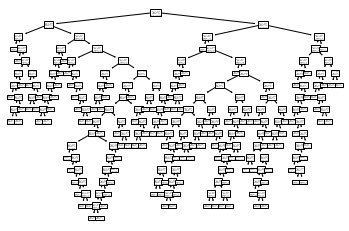

In [10]:

#iris
resultados_c45 = return_model_c45_result( data, ["trestbps","thalach"], 'y' )

clf_2 = sklearn.tree.DecisionTreeClassifier()
clf_2 = clf.fit( data[['trestbps','thalach']], data[['y']] )

fig, axes = plt.subplots(nrows = 1,ncols = 1)
tree.plot_tree(clf_2)
fig.savefig('teste.pdf')


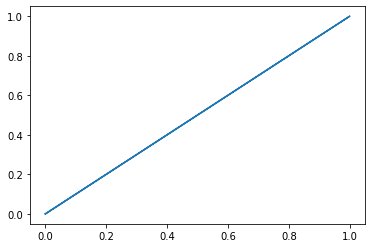

In [11]:
x2 = [ k[1] for k in clf_2.predict_proba( data[["trestbps","thalach"]] ) ] 



Erros = [ x2[k] != resultados_c45[k] for k in range(0, len( x2 ) ) ]

Wrong_cases = data.loc[ Erros, ['age','trestbps','y'] ] 


res_1, res_2 = pd.DataFrame({"x2":x2}).loc[Erros,:], pd.DataFrame({"x3":resultados_c45}).loc[Erros,:]

pd.concat(  [Wrong_cases, res_1, res_2], axis = 1   )


plt.plot( x2, resultados_c45 )
plt.show()

In [12]:
pd.DataFrame( {"x1": x2, "x2": resultados_c45 } )

,x1,x2
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,0.0,0.0
4,0.0,0.0
...,...,...
298,1.0,1.0
299,1.0,1.0
300,1.0,1.0
301,1.0,1.0


# CART Algoritm

Apresentados os algoritmos ID3 e C4.5 vamos para o algoritmo CART (Classification and Regression Trees), essencialmente, a grande diferença do CART para os algoritmos ID3 e C4.5 é que quando estamos falando de um CART estamos falando de uma arvore de decisão que também resolve problemas de regressão, isso quer dizer que nossa sáida não será mais apenas binaria como apresentamos nos exemplos anteriores.

Nossa variável resposta será uma variaveis que pode pertencer ao intervalo dos reais

$$ y \in \mathbb{R} $$

e nosso conjunto de variaveis $x$ entra como parte 

In [2]:

import matplotlib.pyplot as plt

data_house = pd.read_excel( r'https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx',
                            sheet_name = 0 )

new_cols = [ "trans_date", "house_age", "dist_mrt_stat", "num_conv_stor", "lat", "long", "house_price" ]

data_house = ( data_house.
                  iloc[:,1:].
                  rename( { data_house.columns[1:][i] : new_cols[i] for i in range( 0, len( new_cols ) ) }, 
                          axis = "columns" ) )

data_house.describe()

    
    

,trans_date,house_age,dist_mrt_stat,num_conv_stor,lat,long,house_price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


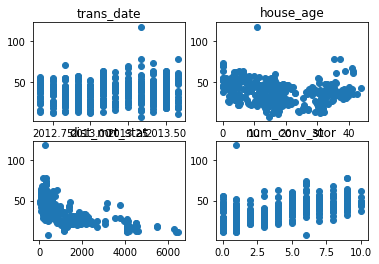

In [3]:

figure, axis = plt.subplots(2, 2)

axis[0,0].scatter( data_house['trans_date'], data_house['house_price'] )
axis[0,0].set_title( 'trans_date' )

axis[0,1].scatter( data_house['house_age'], data_house['house_price'] )
axis[0,1].set_title( 'house_age' )

axis[1,0].scatter( data_house['dist_mrt_stat'], data_house['house_price'] )
axis[1,0].set_title( 'dist_mrt_stat' )

axis[1,1].scatter( data_house['num_conv_stor'], data_house['house_price'] )
axis[1,1].set_title( 'num_conv_stor' )

plt.show()


#plt.scatter( data_house['num_conv_stor'], data_house['house_price'] )
#plt.xlabel("House Age")
#plt.ylabel("House Price")
#plt.show() 

In [47]:
# Funcoes de custo
#
# @x - Vetor de variaveis estimadas
# @y - Vetor de variaveis dependentes

# MAE ( Mean Absolute Error )
def mae( yp, y ):
    return abs( yp - y )

# Poisson Difference
def poisson( yp, y ):
    return y*np.log( y/yp ) - y + yp

# MSE ( Mean Squared Error )
def mse( yp, y ):
    return (yp - y)**2

# Calculo ponto de quebra por meio do desvio de poisson 
#
# @s - Ponto de quebra da variavel continua - x
# @x - Variavel explicativa
# @y - Variavel Dependente

def calc_split_poid( s, x, y ):
    n1, n2 = len( x[ x <= s ] ), len( x[ x > s ] )
    m1, m2 = np.mean( y[ x <= s ] ), np.mean( y[ x > s ] )
    return np.mean( np.concatenate( ([ poisson( m1, y[ x <= s ][i] ) for i in range(0,n1) ],
                                     [ poisson( m2, y[ x > s  ][i] ) for i in range(0,n2) ] ) ) )

# Calculo ponto de quebra por meio do desvio de poisson 
#
# @s - Ponto de quebra da variavel continua - x
# @x - Variavel explicativa
# @y - Variavel Dependente

def calc_split_mse( s, x, y ):
    n1, n2 = len( x[ x <= s ] ), len( x[ x > s ] )
    m1, m2 = np.mean( y[ x <= s ] ), np.mean( y[ x > s ] )
    return np.mean( np.concatenate( ([ mse( m1, y[ x <= s ][i] ) for i in range(0,n1) ],
                                     [ mse( m2, y[ x > s  ][i] ) for i in range(0,n2) ] ) ) )
     
        
# Pega melhor quebra
#
# @x - Variavel explicativa
# @y - Variavel dependente
# @max_depth - maximo de niveis da variavel
        
def get_best_split( x, y, name, metodo ):
    
    set_x   = sorted( list( set( x ) ) )
    
    split_x = [ np.mean( [set_x[i-1], set_x[i]] ) for i in range( 1, len( set_x ) ) ]
    
    # print( "splits length = ", len( split_x) )
    
    if metodo == "squared":
        x_best  = [ { name+"<="+str(k): calc_split_mse( s = k, x = np.array(x), y = np.array(y))} for k in split_x ]
        
    if metodo == "poisson":
        x_best  = [ { name+"<="+str(k): calc_split_poid( s = k, x = np.array(x), y = np.array(y))} for k in split_x ]
    
    return sorted( x_best, key = lambda x: list(x.values())[0] )



# Constroi Modelo de arvore de regressao
#
# @data      - Pandas Data Frame com conjunto de dados
# @x         - Lista com variaveis explicativas do modelo
# @y         - String com variavel dependente
# @metodo    - String sendo "squared" para metodo MSE ou "poisson" para Poisson
# @max_depth - Maximo de iteracoes permitidas 
# @return    - retorna um dicionario com as variaveis escolhidas, pontos de corte e resultados

def reg_tree_model( data, x, y, max_depth, metodo = "squared" ):
    
    # Divisão de retorno entre
    #
    # 1.  
    # 2.
        
    if max_depth > 0 :
        
        print( "md = ",max_depth,
               "rows = ", len( data[y] ) )
        
        #print( { i: len( list( set( data[i] ) ) )  for i in x } )
        
        if len( data[y] ) == 1 :
            return { 'm' : np.mean( data[y] ), 'N' : len( data[y] ) }  
        
        x_vars = list( filter( lambda k: len( set( data[k] ) )> 1, x ) )
        #print( x_vars )
        
        if len( x_vars ) == 0:
            return { 'm' : np.mean( data[y] ), 'N' : len( data[y] ) }
        
        
        best_var_splits = sorted( [ get_best_split( data[i], data[y], metodo = metodo, name = i )[0] for i in x_vars ],
                                  key = lambda x: list( x.values() )[0] )
        
        items = list( best_var_splits[0].keys() )[0].split("<=")
        
        #print( [ len( set( data.loc[ data[ items[0] ] <= float( items[1] ), items[0] ] ) ),
        #         len( set( data.loc[ data[ items[0] ] >  float( items[1] ), items[0] ] ) ) ] )
        
        #if len( set( data.loc[ data[ items[0] ] <= float( items[1] ), items[0] ] ) ) == 1:
        #    print( "ok" )
        #    return { 'm' : np.mean( data[y] ), 'N' : len( data[y] ) }  
        #else:
        return { "<=".join(items):
                    { True  : reg_tree_model( data = data[ data[items[0]] <= float(items[1]) ], 
                                       x = x, 
                                       y = y, 
                                       metodo = metodo, 
                                       max_depth = max_depth - 1 ),
                     False : reg_tree_model( data = data[ data[items[0]] > float(items[1]) ], 
                                       x = x, 
                                       y = y, 
                                       metodo = metodo, 
                                       max_depth = max_depth - 1 ) } }
    
        # best_var_splits
        # reg_tree( data = data, x = x, y = y, metodo = metodo, max_depth = max_depth - 1 )
    if max_depth == 0:
        return { 'm' : np.mean( data[y] ), 'N' : len( data[y] ) }

    

def classifica_regtree( reg_model : dict, classes : dict ):
    
    d = reg_model
    
    while 'm' not in [ k[0] for k in list( d.items() ) ]:
        for i,j in d.items():
            #print( i )
            r = list( d.items() )[0]
            if "<=" in i:
                string_ = i.split("<=")
                if classes[ string_[0] ] <= float( string_[1] ):
                    d = list( r[1].items() )[0][1]
                else:
                    d = list( r[1].items() )[1][1]
            else:
                d = list( r[1].items() )[0][1]
    
    #print( d['m'] )
    return d['m']
    
def return_model_reg_tree( data, columns: list[str], y: str, max_depth: int, metodo: str ):      
    tree_reg = reg_tree_model( data = data, x = columns, y = y, metodo = metodo, max_depth = max_depth ) 
    return [ classifica_regtree( tree_reg ,dict( data.loc[ n, columns ] ) ) for n in range(0,len(data)) ]


#tree_reg = reg_tree_model( data      = data_house, 
#                           x         = ['house_age','num_conv_stor'], 
#                           y         = 'house_price', 
#                           metodo    = 'squared', 
#                           max_depth = 5 )


#model_results = return_model_reg_tree( data      = data_house, 
#                                       columns   = ['house_age','num_conv_stor'], 
#                                       y         = 'house_price', 
#                                       max_depth = 5, 
#                                       metodo    = 'squared' )


md =  6 rows =  414
md =  5 rows =  265
md =  4 rows =  90
md =  3 rows =  72
md =  2 rows =  70
md =  1 rows =  26
md =  1 rows =  44
md =  2 rows =  2
md =  1 rows =  1
md =  1 rows =  1
md =  3 rows =  18
md =  2 rows =  16
md =  1 rows =  2
md =  1 rows =  14
md =  2 rows =  2
md =  1 rows =  1
md =  1 rows =  1
md =  4 rows =  175
md =  3 rows =  65
md =  2 rows =  55
md =  1 rows =  35
md =  1 rows =  20
md =  2 rows =  10
md =  1 rows =  8
md =  1 rows =  2
md =  3 rows =  110
md =  2 rows =  52
md =  1 rows =  21
md =  1 rows =  31
md =  2 rows =  58
md =  1 rows =  56
md =  1 rows =  2
md =  5 rows =  149
md =  4 rows =  116
md =  3 rows =  77
md =  2 rows =  26
md =  1 rows =  5
md =  1 rows =  21
md =  2 rows =  51
md =  1 rows =  47
md =  1 rows =  4
md =  3 rows =  39
md =  2 rows =  37
md =  1 rows =  27
md =  1 rows =  10
md =  2 rows =  2
md =  1 rows =  1
md =  1 rows =  1
md =  4 rows =  33
md =  3 rows =  31
md =  2 rows =  27
md =  1 rows =  9
md =  1 rows =  18
md 

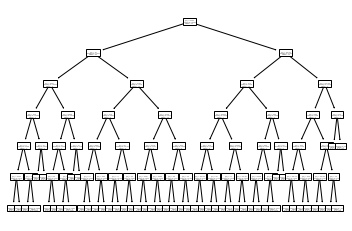

In [52]:

import sklearn
from sklearn import tree
import graphviz

clf_3 = sklearn.tree.DecisionTreeRegressor(max_depth=6)
clf_3 = clf_3.fit( data_house[['house_age','num_conv_stor','dist_mrt_stat']], data_house['house_price'] )


model_results = return_model_reg_tree( data      = data_house, 
                                       columns   = ['house_age','num_conv_stor','dist_mrt_stat'], 
                                       y         = 'house_price', 
                                       max_depth = 6, 
                                       metodo    = 'squared' )



fig, axes = plt.subplots(nrows = 1,ncols = 1)
tree.plot_tree(clf_3)
fig.savefig('teste2.pdf')



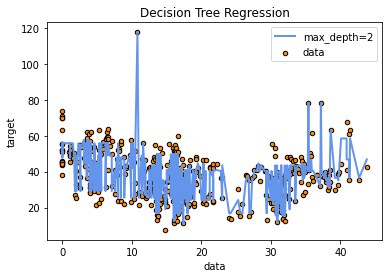

In [54]:


y_1 = clf_3.predict(data_house[['house_age','num_conv_stor','dist_mrt_stat']])

data_2 = ( data_house[['house_age','house_price']].
          assign( y_1 = y_1 ).
          sort_values( by = ['house_age'], axis = 0, ascending = True ) )

plt.figure()
plt.scatter( data_2['house_age'], data_2['house_price'], s=20, edgecolor="black", c="darkorange", label="data")
plt.plot( data_2['house_age'], data_2['y_1'], color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

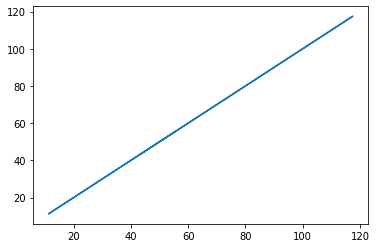

In [59]:
plt.plot( y_1, model_results )
plt.show()

In [58]:
data_results = ( pd.DataFrame( {"sk": y_1, "hand" : model_results }).
                    assign( diferenca = lambda dta: dta['sk']-dta['hand'] ))


data_results.describe( )

,sk,hand,diferenca
count,414.000000,414.000000,4.140000e+02
mean,37.980193,37.980193,-2.402802e-16
std,12.641786,12.641786,3.551020e-15
min,11.200000,11.200000,-7.105427e-15
25%,27.138462,27.138462,0.000000e+00
50%,40.343396,40.343396,0.000000e+00
75%,46.780000,46.780000,0.000000e+00
max,117.500000,117.500000,7.105427e-15


In [37]:
list( filter( lambda x: x > 1, [1,2] ) )

[2]